# 이미지 데이터 가공
---
Pillow를 활용한 이미지 데이터 가공

### 이미지 파일 선택

In [1]:
from PIL import Image
import os

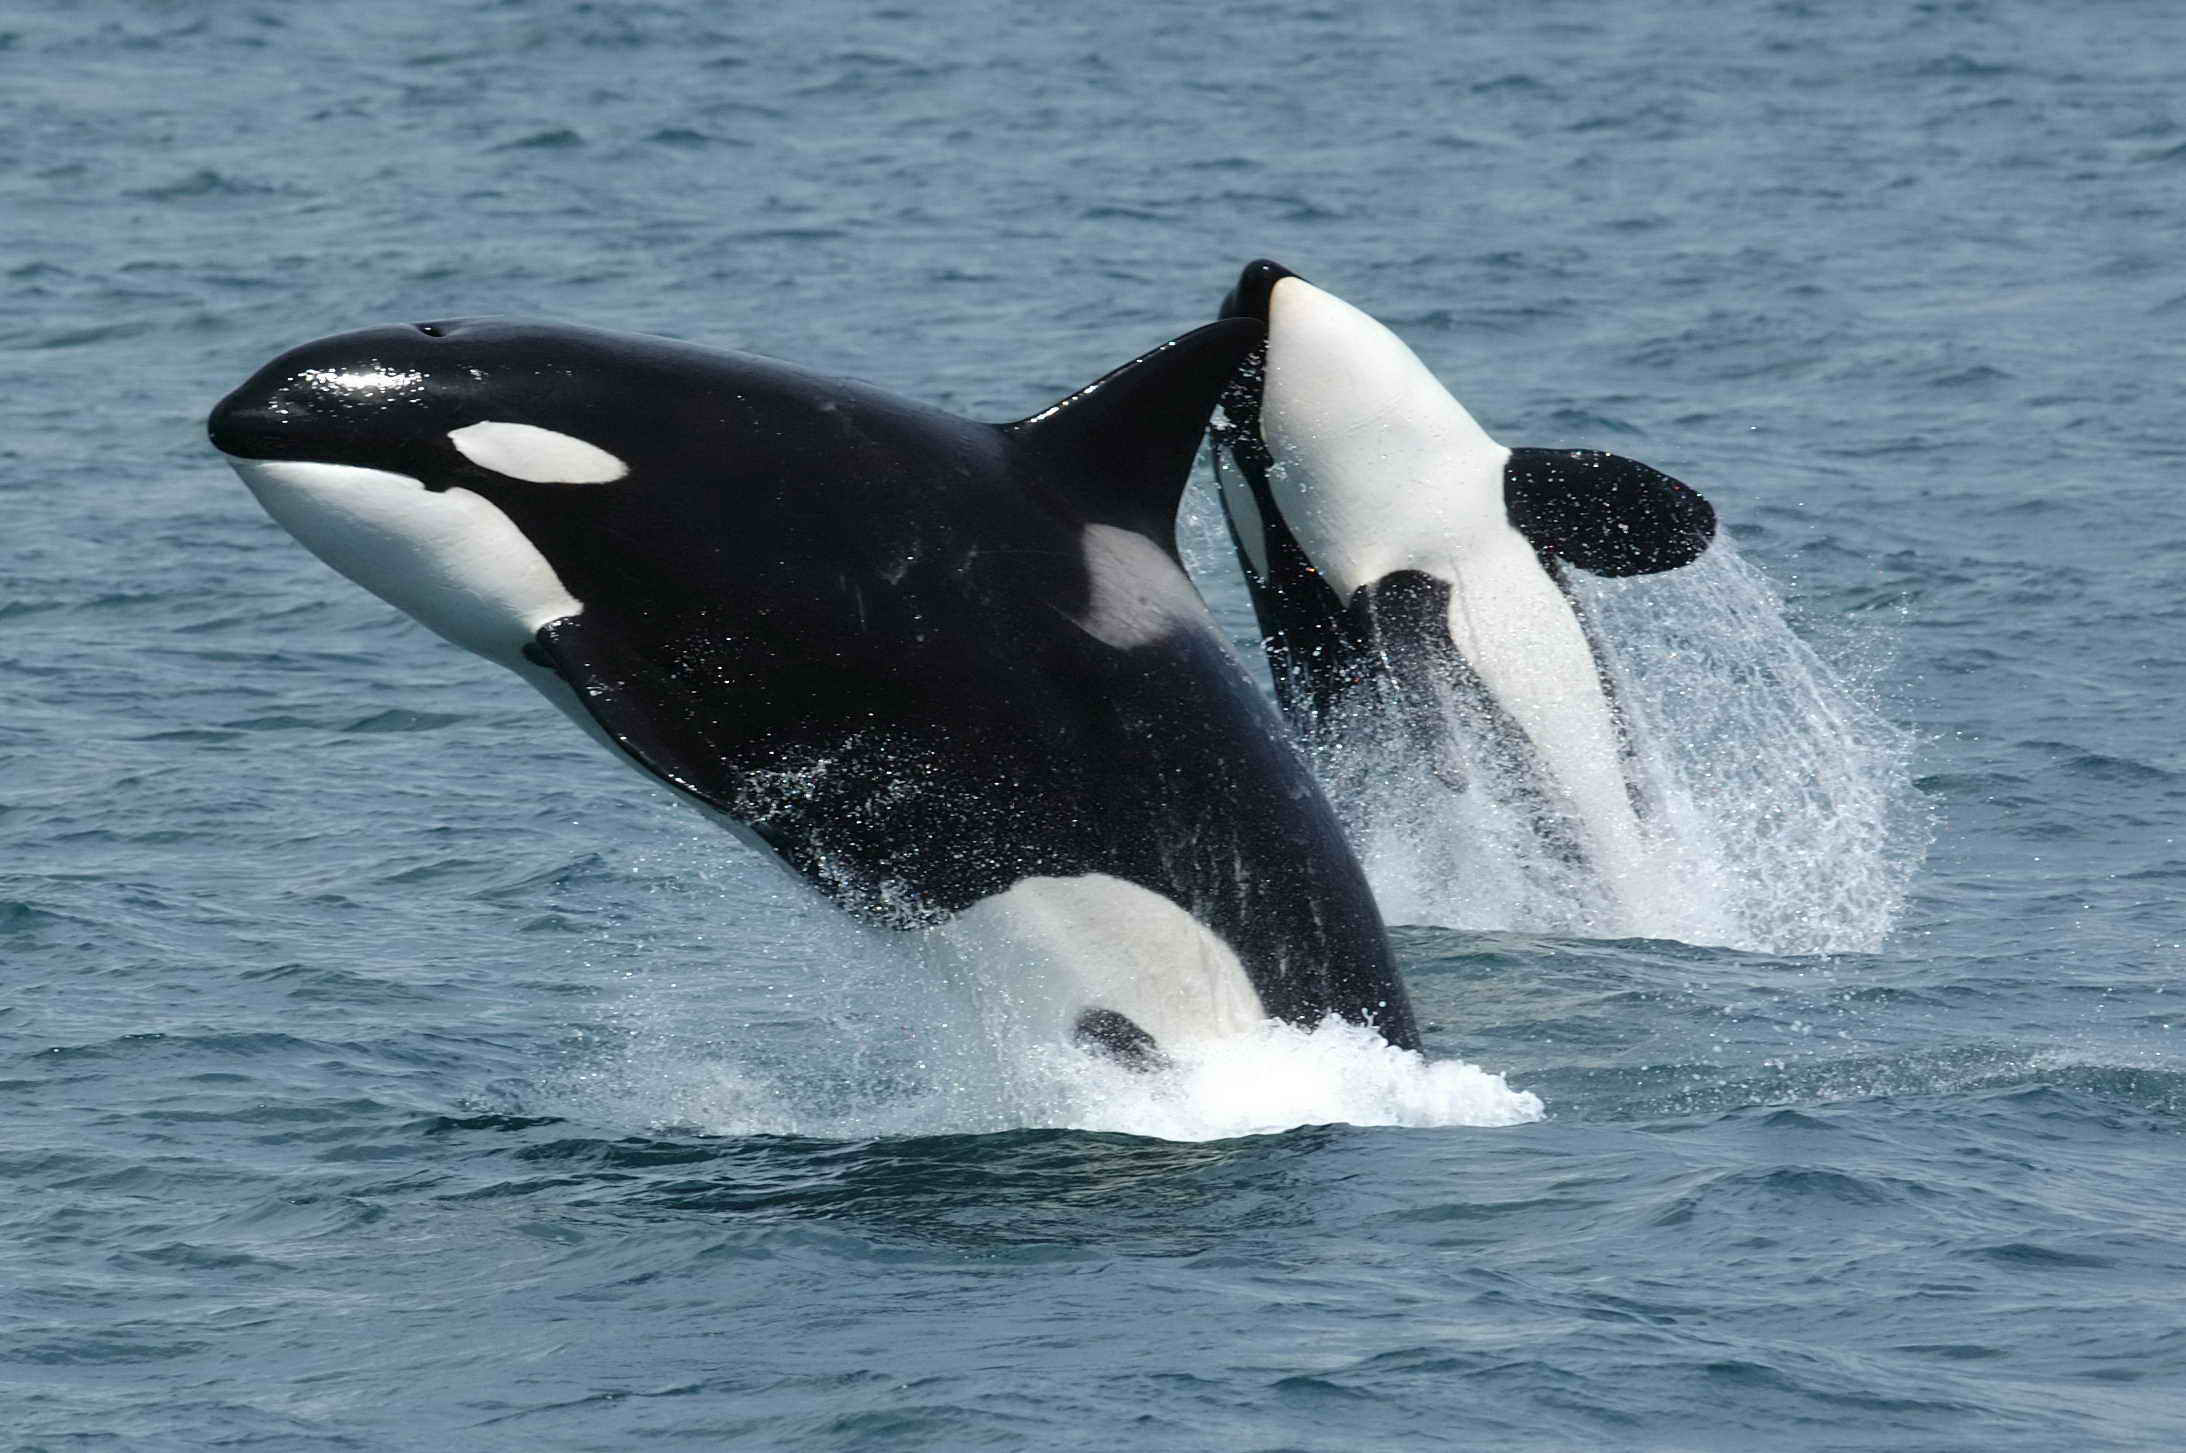

In [2]:
image_path = 'Killerwhales_jumping.jpg'
image = Image.open(image_path)
image

### 이미지 파일 가공 및 전처리

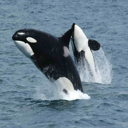

In [3]:
resize = image.resize((128, 128))
resize

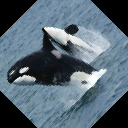

In [4]:
resize.rotate(45)

C:\Users\User\AppData\Local\Temp\ipykernel_4844\594175021.py:1: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  resize.transpose(Image.FLIP_TOP_BOTTOM)


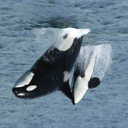

In [5]:
resize.transpose(Image.FLIP_TOP_BOTTOM)

C:\Users\User\AppData\Local\Temp\ipykernel_4844\3984184066.py:1: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  resize.transpose(Image.FLIP_LEFT_RIGHT)


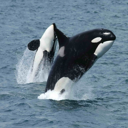

In [6]:
resize.transpose(Image.FLIP_LEFT_RIGHT)

C:\Users\User\AppData\Local\Temp\ipykernel_4844\291307908.py:1: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  resize.transpose(Image.ROTATE_90)


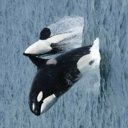

In [7]:
resize.transpose(Image.ROTATE_90)

In [8]:
resize.save('resized.jpg')

### 이미지 파일 필터

In [9]:
from PIL import ImageFilter

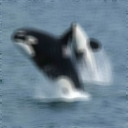

In [10]:
# 블러 처리
resize.filter(ImageFilter.BLUR)

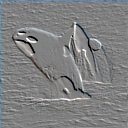

In [11]:
# 엠보싱
resize.filter(ImageFilter.EMBOSS)

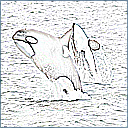

In [12]:
# 윤곽
resize.filter(ImageFilter.CONTOUR)

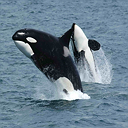

In [13]:
# 자세히
resize.filter(ImageFilter.DETAIL)

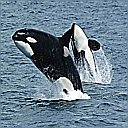

In [14]:
# 날카롭게
resize.filter(ImageFilter.EDGE_ENHANCE)

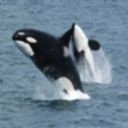

In [15]:
# 부드럽게
resize.filter(ImageFilter.SMOOTH)

#### 자주 쓰이는 색상 표현
---
1.	L : 흑백
2.	RGB : Red, Green, Blue 삼원색을 이용한 색 표현
3.	RGBA : Red, Green, Blue 삼원색을 이용한 색 표현 방법 + 투명도
4.	CMYK : Cyan, Magenta, Yellow, Black 을 이용한 색 표현 방법

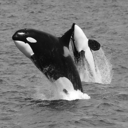

In [16]:
# 8bit 그레이로 변경
resize.convert('L')

### 열 변환

In [17]:
import numpy as np

In [18]:
m = np.asarray(resize)
m.shape

(128, 128, 3)

### 흑백변환

In [19]:
bw = np.asarray(resize.convert('L'))
bw.shape

(128, 128)

### 텍스트 삽입

In [20]:
from PIL import ImageDraw, ImageFont

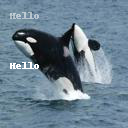

In [21]:
base = Image.open("resized.jpg").convert('RGBA')

# 흰색-투명으로 이미지와 같은 크기 이미지 하나 더 만들기
txt = Image.new('RGBA', base.size, (255, 255, 255, 0))
d = ImageDraw.Draw(txt)

d.text((10, 10), "Hello", fill=(255, 255, 255, 128)) #위치 텍스트, 색-반투명
d.text((10, 60), "Hello", fill=(255, 255, 255, 255)) #위치 텍스트, 색-불투명

Image.alpha_composite(base, txt)